In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [16]:
import pandas as pd
df = pd.read_csv('concrete_data.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
807,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,28,37.42
812,310.0,0.0,0.0,192.0,0.0,970.0,850.0,90,34.68
773,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,28,37.42
404,275.0,180.0,120.0,162.0,10.4,830.0,765.0,28,76.24
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26


## Box-Cox :: No. only greater than 0
0. for each Col new lambda
1. xi_k = (xi**k - 1)/k if k != 0
2. xi_k = ln(xi) if k = 0
3. exponent here is variable lambda or K that varies over [-5,5] we try all values and get best value for which normal created

## Yeo-Jhonson :: For All numbers
1. xi_k = [(xi + 1)**k -1]/k || k!=0, xi>=0
2. xi_k = ln(xi) + 1 || k==0, xi>=0
3. xi_k = -[(-xi + 1)**(2-k) -1]/(2-k) || k!=2, xi<0
4. xi_k = -ln(-xi + 1) || k==2, xi<0

In [17]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [18]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

r2_score(ytest,ypred)

0.6275531792314848

In [21]:
# Cross Validate
np.mean(cross_val_score(lr,x,y,scoring="r2",cv=10))

0.27820729160873753

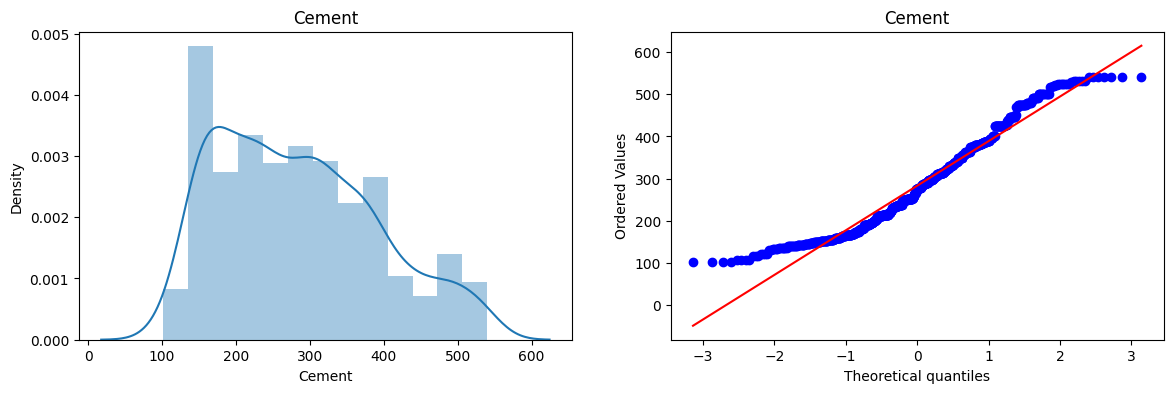

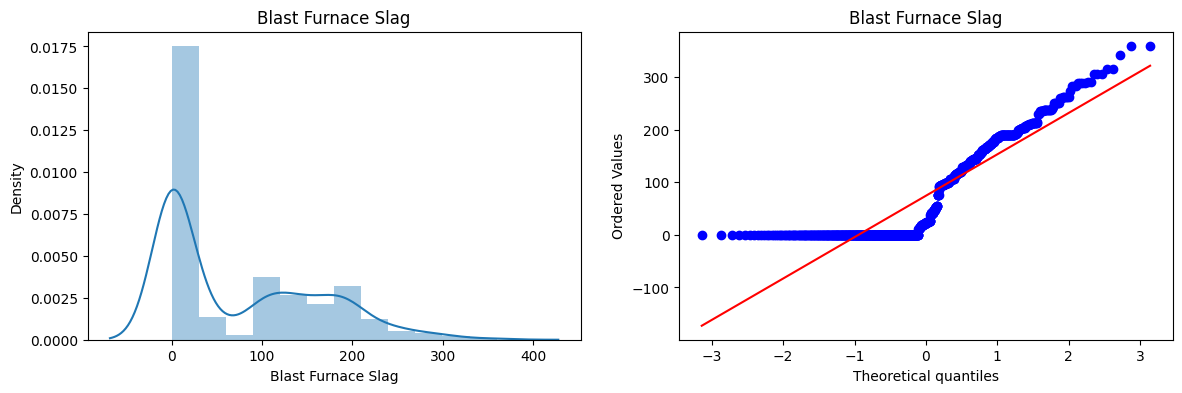

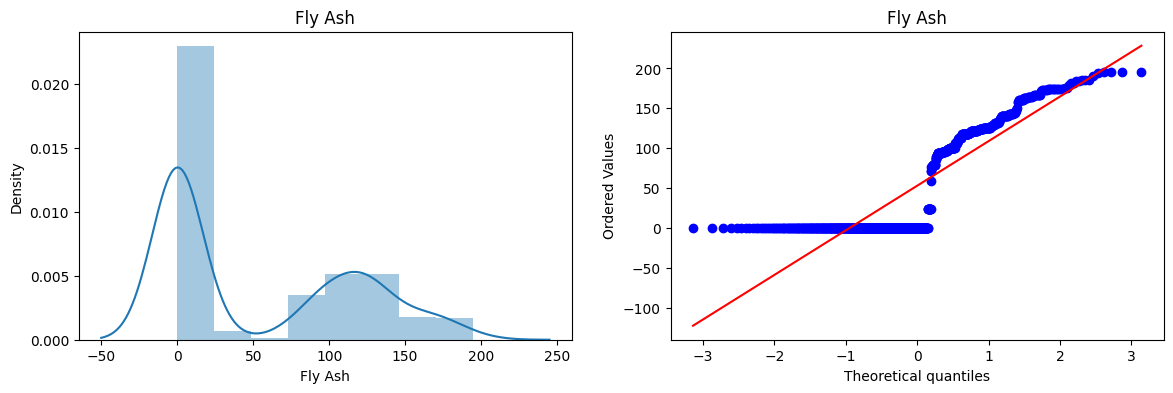

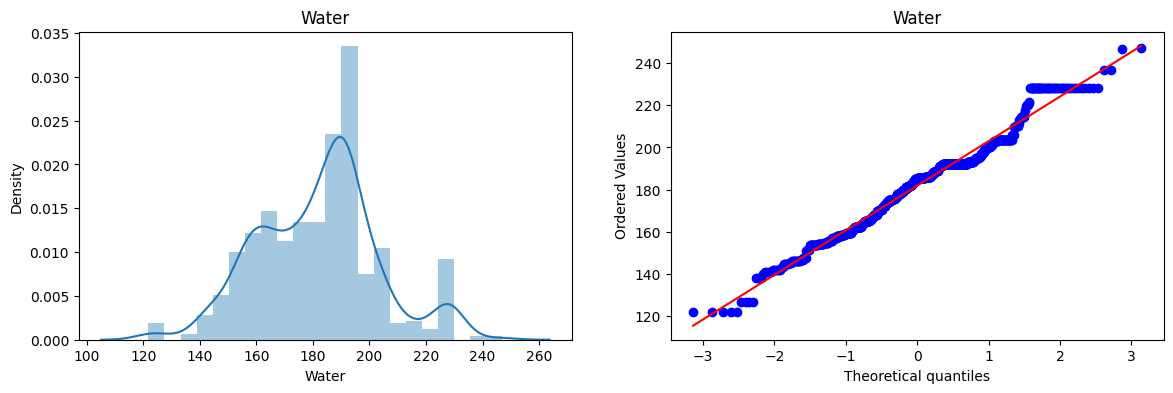

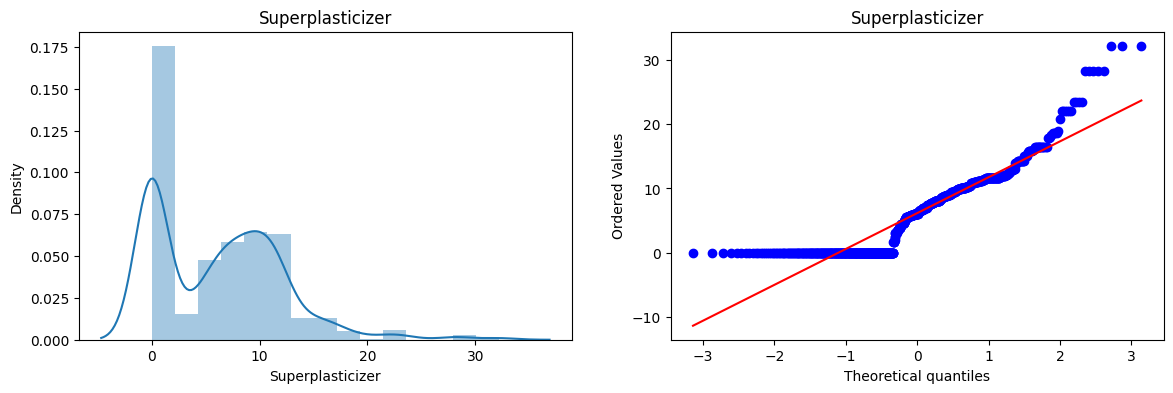

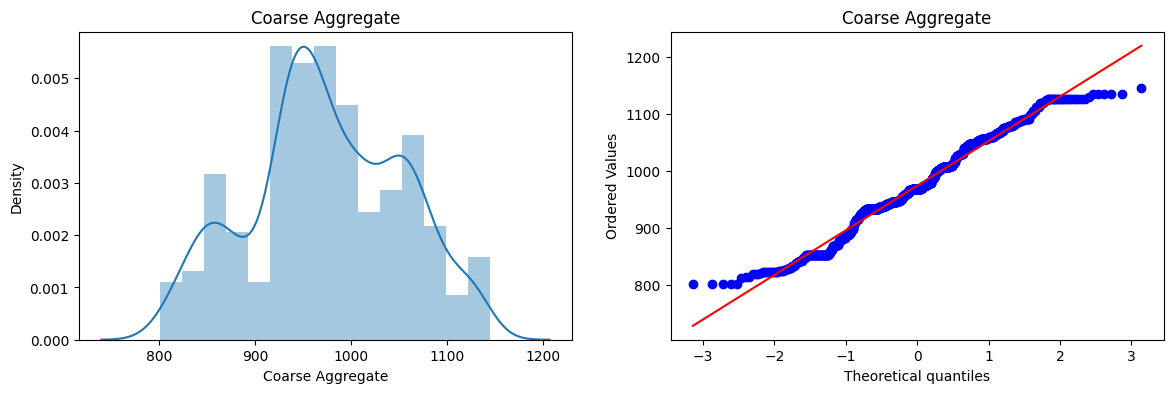

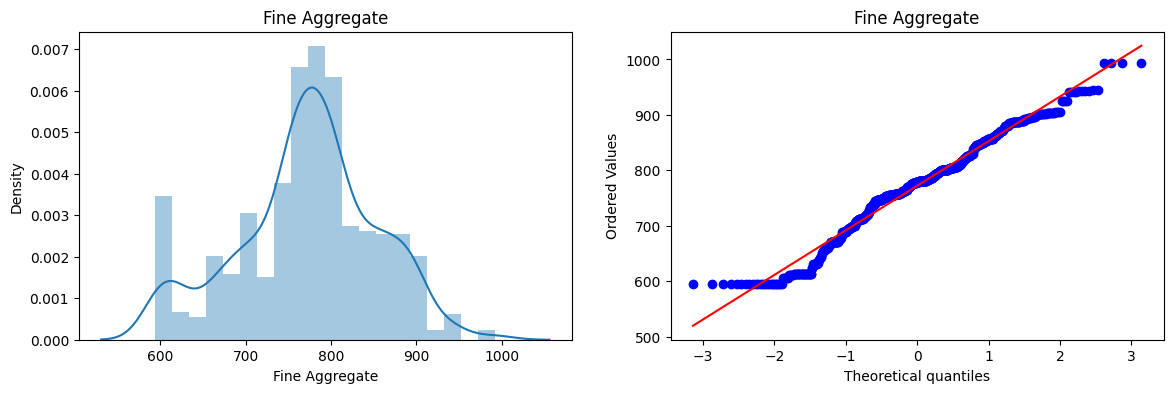

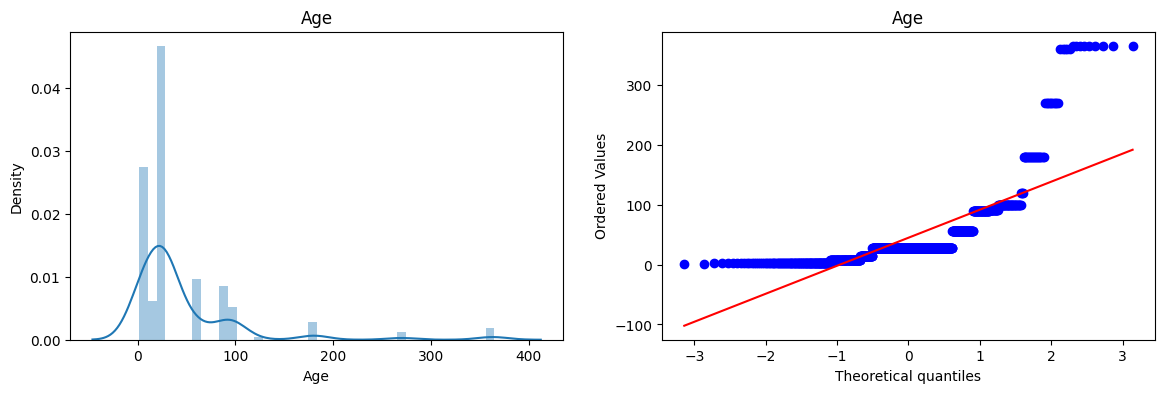

In [22]:
# Plot Of cols
for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(xtrain[col])
    plt.title(col)
    plt .subplot(122)
    stats.probplot(xtrain[col],dist="norm",plot = plt)
    plt.title(col)

    plt.show()


### Above Can be seen many don't follow Normal Dist

## Box - Cox  
1. Standardization Default
2. For each col new lambda

In [26]:
# Default is Yea-Jhonson in pt
pt = PowerTransformer(method="box-cox")
# Ressolve 0 for Box-cox
xtrain_trans = pt.fit_transform(xtrain+0.000001)
xtest_trans = pt.transform(xtest+0.000001)

pd.DataFrame({'cols': xtrain.columns, 'Box-Cox-Lambdas':pt.lambdas_})

,cols,Box-Cox-Lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [27]:
lr = LinearRegression()
lr.fit(xtrain_trans,ytrain)

ypred2 = lr.predict(xtest_trans)

r2_score(ytest,ypred2)


0.8047825006181188

In [28]:
# Cross val
x_trans2 = pt.fit_transform(x+0.000001)

np.mean(cross_val_score(lr,x_trans2,y,scoring='r2',cv=10))


0.646676475101492